<a href="https://colab.research.google.com/github/Um333r/AirSatisPredict/blob/master/invistico_Airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Goal:**


Develop and evaluate a predictive model using machine learning techniques to determine customer satisfaction with airline services based on historical customer feedback. The primary objective of this project is to construct a robust and accurate model that can predict whether a future customer will be satisfied with their flight experience using relevant features extracted from previous customer feedback. Additionally, the project aims to identify and rank the most influential features that contribute to customer satisfaction, providing valuable insights to the airline for enhancing their services and improving overall customer experience.



In [6]:
#import packages
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#load dataset
orginal_data= pd.read_csv('/content/invistico_Airline.csv')
orginal_data.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3.0,5.0,3.0,2.0,0.0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4.0,2.0,3.0,2.0,310.0,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4.0,4.0,4.0,2.0,0.0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1.0,4.0,1.0,3.0,0.0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2.0,4.0,2.0,5.0,0.0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5.0,5.0,4.0,2.0,0.0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5.0,5.0,5.0,3.0,17.0,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4.0,5.0,4.0,2.0,0.0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1.0,5.0,4.0,4.0,0.0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5.0,3.0,4.0,2.0,30.0,26.0


In [8]:
orginal_data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                     float64
Checkin service                      float64
Cleanliness                          float64
Online boarding                      float64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
dtype: obj

In [9]:
orginal_data['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [10]:
from matplotlib.colors import Normalize
orginal_data['satisfaction'].value_counts(dropna=False,normalize=True)*100

dissatisfied    56.32368
satisfied       43.67632
Name: satisfaction, dtype: float64

In [11]:
orginal_data.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       1
Checkin service                        1
Cleanliness                            1
Online boarding                        1
Departure Delay in Minutes             1
Arrival Delay in Minutes             314
dtype: int64

In [12]:
orginal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102385 entries, 0 to 102384
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       102385 non-null  object 
 1   Customer Type                      102385 non-null  object 
 2   Age                                102385 non-null  int64  
 3   Type of Travel                     102385 non-null  object 
 4   Class                              102385 non-null  object 
 5   Flight Distance                    102385 non-null  int64  
 6   Seat comfort                       102385 non-null  int64  
 7   Departure/Arrival time convenient  102385 non-null  int64  
 8   Food and drink                     102385 non-null  int64  
 9   Gate location                      102385 non-null  int64  
 10  Inflight wifi service              102385 non-null  int64  
 11  Inflight entertainment             1023

In [13]:
orginal_data['Arrival Delay in Minutes'].isnull().sum()/len(orginal_data['satisfaction'])*100

0.3066855496410607

There is very percentage of (0.302%)missing value in the dataset,hence they can be removed.

In [14]:
df_subset = orginal_data.dropna(axis=0).reset_index(drop=True)

In [15]:
df_subset.isna().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [16]:
df_subset.shape

(102071, 22)

In [17]:
df_subset['Class']= df_subset['Class'].map({"Business":3,"Eco Plus":2,"Eco":1})

In [18]:
df_subset['satisfaction'] = df_subset['satisfaction'].replace({"satisfied":1,"dissatisfied":0})

In [19]:
#Converting categorical column into numeric
df_subset= pd.get_dummies(df_subset,drop_first=True)

In [20]:
df_subset.dtypes

satisfaction                           int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                     float64
Checkin service                      float64
Cleanliness                          float64
Online boarding                      float64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
Customer Type_disloyal Customer        uint8
Type of Travel_Personal Travel         uint8
dtype: obj

**Create the training and testing data**

In [21]:
y=df_subset['satisfaction']
X= df_subset.copy()
X= X.drop("satisfaction",axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

**Model Building**

In [22]:
decision_tree= DecisionTreeClassifier(random_state=0) # random_state=0 to keep same results whenever we run the code

In [23]:
decision_tree.fit(X_train,y_train)
dt_pred = decision_tree.predict(X_test)


**Results and evaluation**

In [24]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.919508
Precision: 0.904523
Recall: 0.910569
F1 Score: 0.907536


The scores are good, but there is possibility of overfitting.Combining hyperparameter tuning and grid search can help to over come overfitting problem.

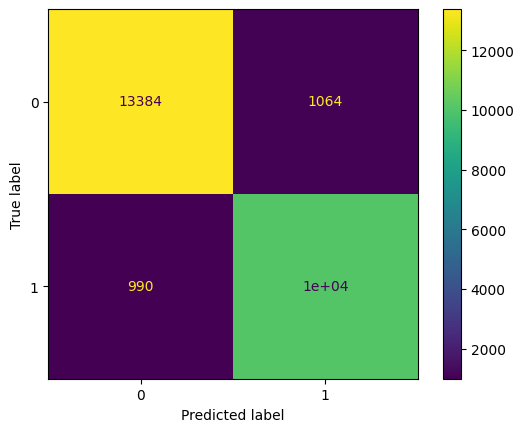

In [25]:
#Confusion Matrix
cm = metrics.confusion_matrix(y_test,dt_pred,labels= decision_tree.classes_)
disp= metrics.ConfusionMatrixDisplay(confusion_matrix= cm,display_labels=decision_tree.classes_)
disp.plot()

In the confusion matrix, there are a high proportion of true positives and true negatives (where the
matrix accurately predicted that the customer would be satisfied or dissatified, respectively).


The matrix also had a relatively low number of false positives and false negatives.

**Decision Tree**

[Text(0.45652173913043476, 0.9, 'Inflight entertainment <= 3.5\ngini = 0.492\nsamples = 76553\nvalue = [43033, 33520]'),
 Text(0.1956521739130435, 0.7, 'Seat comfort <= 0.5\ngini = 0.288\nsamples = 40847\nvalue = [33735, 7112]'),
 Text(0.08695652173913043, 0.5, 'Online boarding <= 0.5\ngini = 0.007\nsamples = 1989\nvalue = [7, 1982]'),
 Text(0.043478260869565216, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.13043478260869565, 0.3, 'gini = 0.0\nsamples = 1982\nvalue = [0, 1982]'),
 Text(0.30434782608695654, 0.5, 'Seat comfort <= 3.5\ngini = 0.229\nsamples = 38858\nvalue = [33728, 5130]'),
 Text(0.21739130434782608, 0.3, 'Customer Type_disloyal Customer <= 0.5\ngini = 0.13\nsamples = 34813\nvalue = [32382, 2431]'),
 Text(0.17391304347826086, 0.1, '\n  (...)  \n'),
 Text(0.2608695652173913, 0.1, '\n  (...)  \n'),
 Text(0.391304347826087, 0.3, 'Seat comfort <= 4.5\ngini = 0.444\nsamples = 4045\nvalue = [1346, 2699]'),
 Text(0.34782608695652173, 0.1, '\n  (...)  \n'),
 Text(0.43

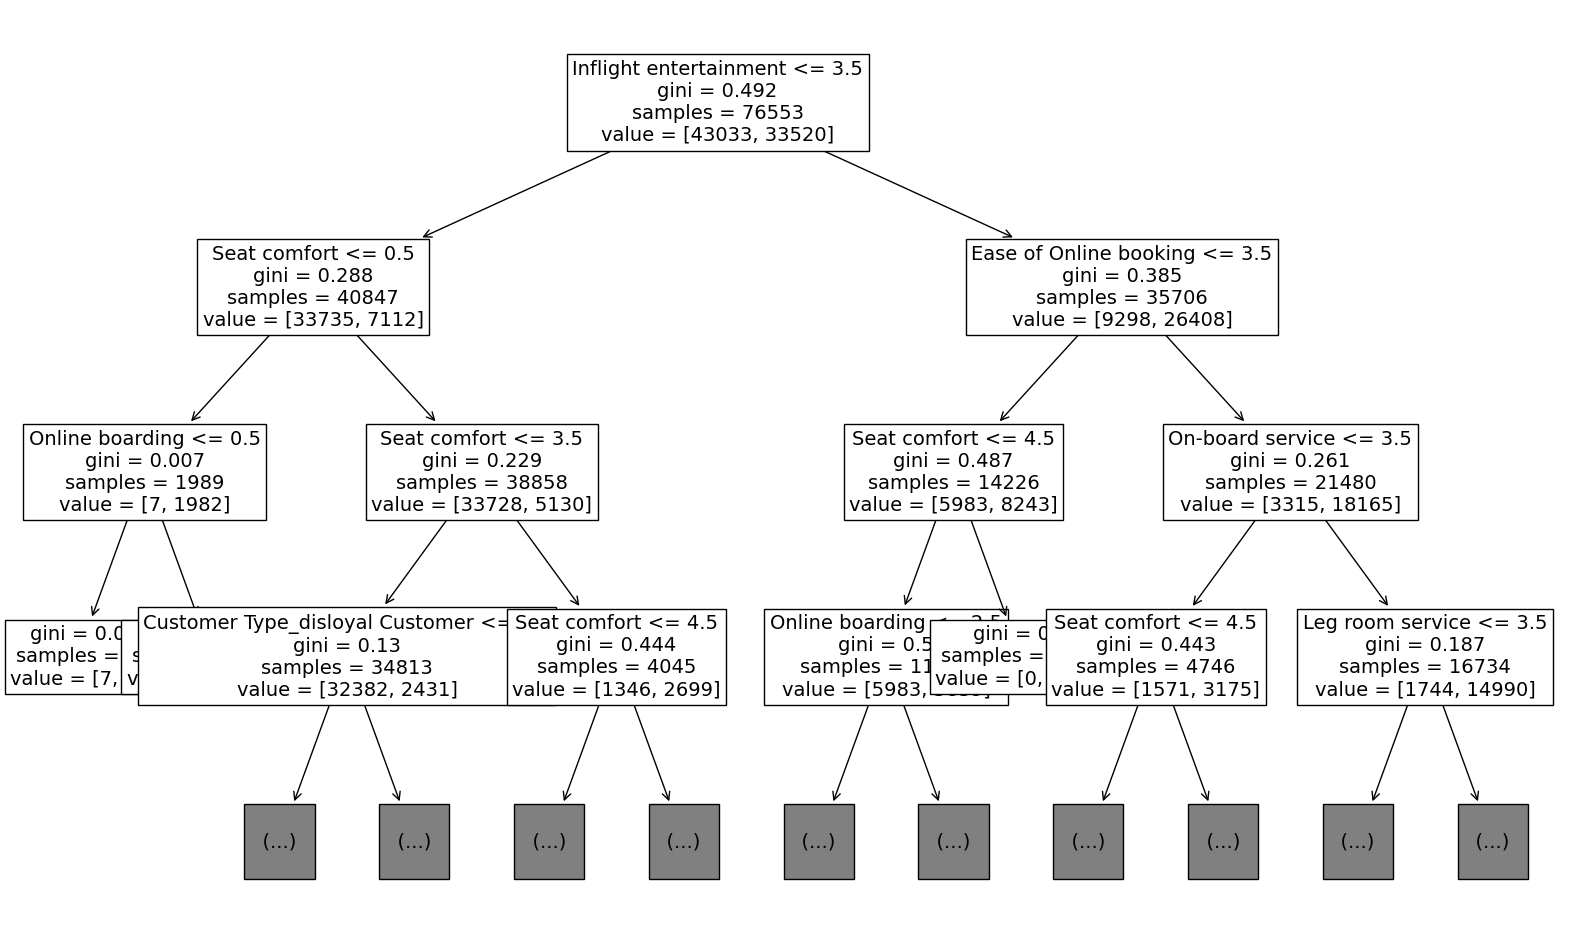

In [26]:
plt.figure(figsize=(20,12))
plot_tree(decision_tree,max_depth=3,fontsize=14,feature_names=X.columns)

Build a Feature Importance Graph

<Axes: >

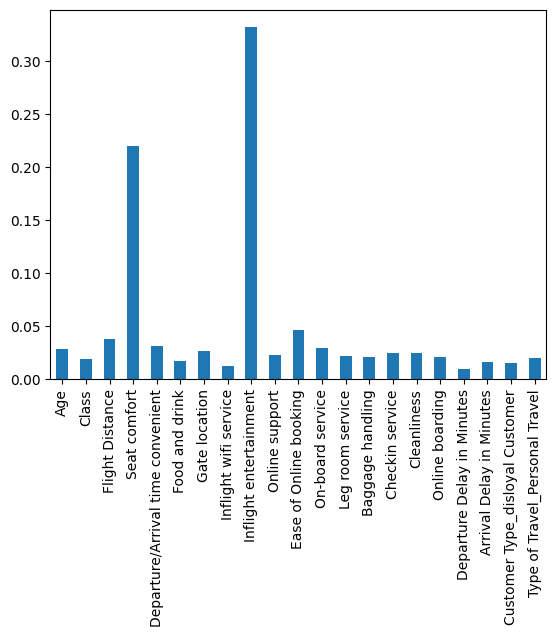

In [27]:
importances=decision_tree.feature_importances_
forest_importances= pd.Series(importances,index=X.columns)
fig,ax = plt.subplots()
forest_importances.plot.bar(ax=ax)

The feature importance graph seems to confirm that 'Inflight entertainment', 'Seat
comfort', and 'Ease of Online booking' are the most important features for this model.


**Hyperparameter** **tuning**


In [28]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [29]:
tuned_decision_tree = DecisionTreeClassifier(random_state=0)
clf=GridSearchCV(tuned_decision_tree,tree_para,scoring=scoring,cv=5,refit="f1")
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1', scoring={'precision', 'accuracy', 'recall', 'f1'})

In [30]:
clf.best_estimator_



DecisionTreeClassifier(max_depth=14, min_samples_leaf=2, random_state=0)

After running the DecisionTreeClassifier, the maximum depth is 14 and the minimum number of
samples is 2, meaning this is the best combination of values.

**Best average validation score**

In [31]:
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)


Best Avg. Validation Score:  0.9143


In [38]:
results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision','Accuracy'])
def make_results(model_name, model_object):


# Get all the results from the CV and put them in a df.
  cv_results = pd.DataFrame( model_object.cv_results_ )
# Isolate the row of the df with the max(mean f1 score).
  best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]
# Extract accuracy, precision, recall, and f1 score from that row.
  f1 = best_estimator_results.mean_test_f1
  recall = best_estimator_results.mean_test_recall
  precision = best_estimator_results.mean_test_precision
  accuracy = best_estimator_results.mean_test_accuracy
# Create a table of results.
  table = pd.DataFrame()
  table = table.append({'Model': model_name,
                          'F1': f1,
                          'Recall': recall,
                          'Precision': precision,
                          'Accuracy': accuracy},
                          ignore_index=True)
  return table
result_table = make_results("Tuned Decision Tree", clf)
result_table

<ipython-input-38-3c9c489aa05b>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.914261,0.901163,0.927813,0.925999


The F1 score for the decision tree that was not hyperparameter tuned is 0.919508 and the F1 score
for the hyperparameter-tuned decision tree is 0.914261. While ensuring that overfitting doesn’t
occur is necessary for some models, it didn’t make a meaningful difference in improving this model.

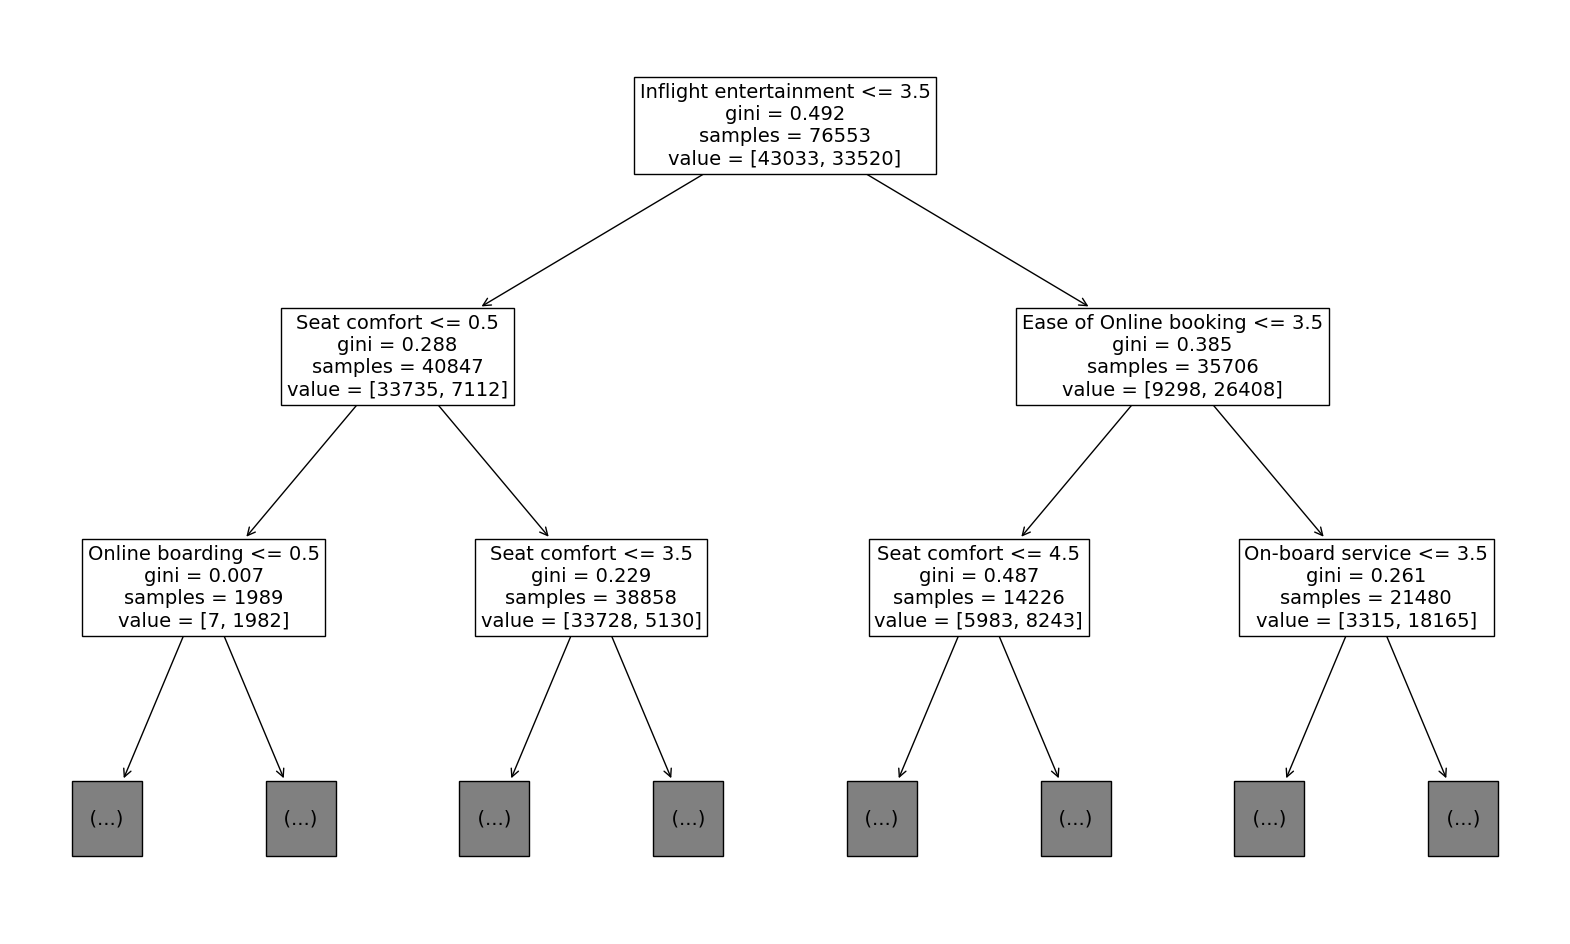

In [39]:
plt.figure(figsize=(20,12))
plot_tree(clf.best_estimator_, max_depth=2, fontsize=14, feature_names=X.columns);

<Axes: >

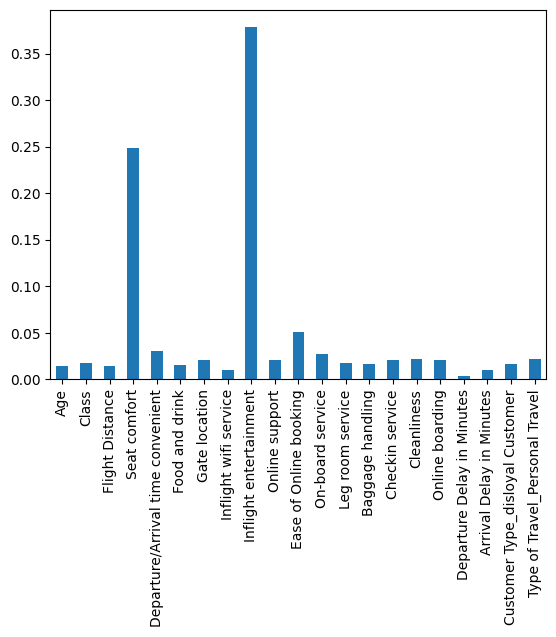

In [40]:
importances = clf.best_estimator_.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)


Yes. The feature importance graph seems to confirm that 'Inflight entertainment', 'Seat
comfort', and 'Ease of Online booking' are the “most important” features for this model.
